# (German Federal Election 2017)
## by (Jean-Pierre Distler)

## Preliminary Wrangling

The dataset contains the results of the german federal election from 2017. The dataset contains 3 files:
1. An overall overview of the valid and invalid first and second votes for all electoral districts and the federal state they belong to.
2. The second file contains the votes for each party in all electoral districts.
3. A shape file containing all electoral districts. This will be used to generate some map plots.

You can find an explanation of the german election system here https://en.wikipedia.org/wiki/Electoral_system_of_Germany

The dataset is in a good shape and doesn't need much cleaning. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpereader

%matplotlib inline

In [2]:
# This file contains the overall results per district
df = pd.read_csv('2017_german_election_overall.csv')
# This file contains the result per party and district
df2 = pd.read_csv('2017_german_election_party.csv')
# This file contains shapes for all districts
geometries = shpereader.Reader('Geometrie_Wahlkreise_19DBT_VG250_geo.shp') 
shapes = list(geometries.geometries())

In [3]:
areas = geometries.records()
areas_as_array = []
for area in areas:
    areas_as_array.append(area.attributes)

In [4]:
party_mapping = {'CDU' : 'Christlich.Demokratische.Union.Deutschlands',
                 'SPD' : 'Sozialdemokratische.Partei.Deutschlands',
                 'Linke' : 'DIE.LINKE',
                 'Grüne' : 'BÜNDNIS.90.DIE.GRÜNEN',
                 'CSU' : 'Christlich.Soziale.Union.in.Bayern.e.V.',
                 'UNION' : 'UNION',
                 'FDP' : 'Freie.Demokratische.Partei',
                 'AFD' : 'Alternative.für.Deutschland',
                 'Piraten' : 'Piratenpartei.Deutschland',
                 'NPD' : 'Nationaldemokratische.Partei.Deutschlands'}

In [5]:
df2.replace('Christlich.Demokratische.Union.Deutschlands', 'UNION', inplace=True)
df2.replace('Christlich.Soziale.Union.in.Bayern.e.V.', 'UNION', inplace=True)




In [6]:
df.head()

,Unnamed: 0,area_id,area_names,state,registered.voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,225659,171905,1647,1509,170258,170396
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,186384,139200,1299,1125,137901,138075
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,175950,132016,1133,1141,130883,130875
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,199632,157387,1285,1119,156102,156268
4,5,5,Kiel,Schleswig-Holstein,204650,151463,1657,1290,149806,150173


In [31]:
def turnout_for_party(party, area):
    temp = df2.query('area_id == @area')
    total_votes = df.query('area_id == @area')['valid_second_votes'].iloc[-1]
    temp = temp.query('party == @party')
    party_votes = sum(temp['votes_second_vote'])
    
    #return  min((party_votes / total_votes) * 2, 1)
    return (party_votes / total_votes)

In [52]:
def draw_turnout_for_party(party, color):
    fig = plt.figure(figsize=(10, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.title('Germany')
    ax.coastlines(resolution='10m')

    i = 0
    for shape in shapes:
        alpha = turnout_for_party(party, i + 1)
        alpha = min(alpha * 2, 1)

        ax.add_geometries([shape], ccrs.PlateCarree(), edgecolor='black', facecolor=color, alpha=alpha)
        i += 1
    ax.set_extent([5,16,47,56], ccrs.PlateCarree())

    plt.show();
    

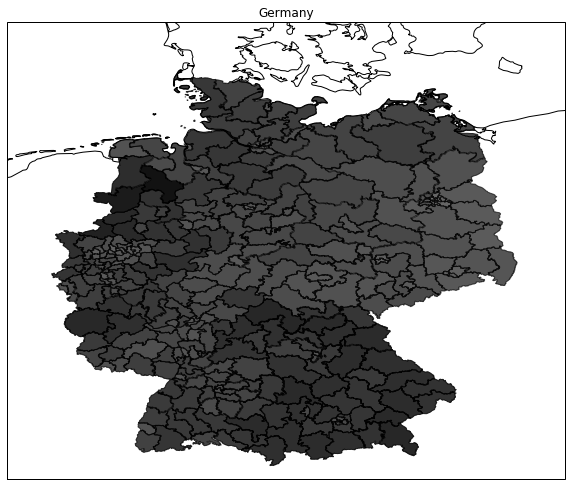

In [51]:
draw_turnout_for_party(party_mapping['UNION'], 'black')

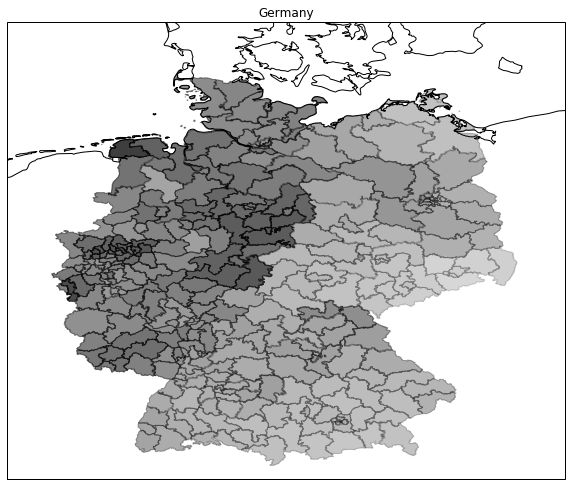

In [53]:
draw_turnout_for_party(party_mapping['SPD'], 'black')

In [9]:
print(areas_as_array[0]['WKR_NAME'])

Flensburg  Schleswig


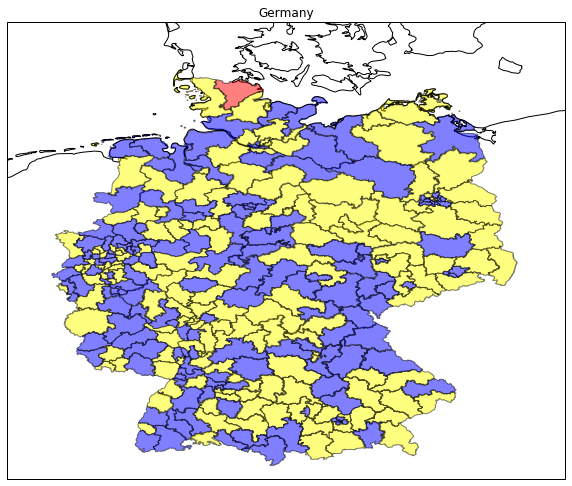

In [13]:
fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Germany')
ax.coastlines(resolution='10m')
colors = ['blue', 'yellow']

i = 0
for shape in shapes:
    if i == 0:
        ax.add_geometries([shape], ccrs.PlateCarree(), edgecolor='black', facecolor='red', alpha=0.5)
        i += 1
    else:
        i += 1
        ax.add_geometries([shape], ccrs.PlateCarree(), edgecolor='black', facecolor=np.random.choice(colors), alpha=0.5)     

ax.set_extent([5,16,47,56], ccrs.PlateCarree())

plt.show();

In [14]:
df.head()

,Unnamed: 0,area_id,area_names,state,registered.voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,225659,171905,1647,1509,170258,170396
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,186384,139200,1299,1125,137901,138075
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,175950,132016,1133,1141,130883,130875
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,199632,157387,1285,1119,156102,156268
4,5,5,Kiel,Schleswig-Holstein,204650,151463,1657,1290,149806,150173


The column *registered.voters* doesn't follow the naming of the other columns so i will rename it.

In [15]:
df.rename(columns={'registered.voters' : 'registered_voters'}, inplace=True)
df.head()

,Unnamed: 0,area_id,area_names,state,registered_voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,225659,171905,1647,1509,170258,170396
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,186384,139200,1299,1125,137901,138075
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,175950,132016,1133,1141,130883,130875
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,199632,157387,1285,1119,156102,156268
4,5,5,Kiel,Schleswig-Holstein,204650,151463,1657,1290,149806,150173


In [16]:
df2.head()

,Unnamed: 0,area_id,area_name,state,party,votes_first_vote,votes_second_vote
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,UNION,68102,58307
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,UNION,62260,52933
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,UNION,54812,47367
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,UNION,66625,56584
4,5,5,Kiel,Schleswig-Holstein,UNION,45691,40011


In [17]:
df2.head()

,Unnamed: 0,area_id,area_name,state,party,votes_first_vote,votes_second_vote
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,UNION,68102,58307
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,UNION,62260,52933
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,UNION,54812,47367
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,UNION,66625,56584
4,5,5,Kiel,Schleswig-Holstein,UNION,45691,40011


In [18]:
df2.party.unique()


array(['UNION', 'Sozialdemokratische.Partei.Deutschlands', 'DIE.LINKE',
       'BÜNDNIS.90.DIE.GRÜNEN', 'Freie.Demokratische.Partei',
       'Alternative.für.Deutschland', 'Piratenpartei.Deutschland',
       'Nationaldemokratische.Partei.Deutschlands', 'FREIE.WÄHLER',
       'PARTEI.MENSCH.UMWELT.TIERSCHUTZ',
       'Ökologisch.Demokratische.Partei',
       'Partei.für.Arbeit..Rechtsstaat..Tierschutz..Elitenförderung.und.basisdemokratische.Initiative',
       'Bayernpartei', 'Ab.jetzt...Demokratie.durch.Volksabstimmung',
       'Partei.der.Vernunft',
       'Marxistisch.Leninistische.Partei.Deutschlands',
       'Bürgerrechtsbewegung.Solidarität',
       'Sozialistische.Gleichheitspartei..Vierte.Internationale',
       'DIE.RECHTE', 'Allianz.Deutscher.Demokraten',
       'Allianz.für.Menschenrechte.Tier..und.Naturschutz',
       'bergpartei..die.überpartei', 'Bündnis.Grundeinkommen',
       'DEMOKRATIE.IN.BEWEGUNG', 'Deutsche.Kommunistische.Partei',
       'Deutsche.Mitte', 'Die.Grauen

In [19]:
df2.party


0         UNION
1         UNION
2         UNION
3         UNION
4         UNION
5         UNION
6         UNION
7         UNION
8         UNION
9         UNION
10        UNION
11        UNION
12        UNION
13        UNION
14        UNION
15        UNION
16        UNION
17        UNION
18        UNION
19        UNION
20        UNION
21        UNION
22        UNION
23        UNION
24        UNION
25        UNION
26        UNION
27        UNION
28        UNION
29        UNION
          ...  
12827    Übrige
12828    Übrige
12829    Übrige
12830    Übrige
12831    Übrige
12832    Übrige
12833    Übrige
12834    Übrige
12835    Übrige
12836    Übrige
12837    Übrige
12838    Übrige
12839    Übrige
12840    Übrige
12841    Übrige
12842    Übrige
12843    Übrige
12844    Übrige
12845    Übrige
12846    Übrige
12847    Übrige
12848    Übrige
12849    Übrige
12850    Übrige
12851    Übrige
12852    Übrige
12853    Übrige
12854    Übrige
12855    Übrige
12856    Übrige
Name: party, Length: 128

### What is the structure of your dataset?

The first file **2017_german_election_overall.csv** contains the following variables:
- **area_id**: An id number for the electoral_state.
- **area_names**: The name of the electoral districts.
- **state**: The federal state the district belongs to.
- **registered.voters**: The number of people in the district that are eligible to vote.
- **total_votes**: The number of people that voted.
- **invalid_first_vote**: The number of invalid votes. (E.g. Someone voted for more than one candiate)
- **valid_first_votes**: The number of valid votes.
- **invalid_second_votes**: The same as for invalid_first_votes, but this vote is for a party and not for a specific candidate.
- **valid_second_votes**: The number of valid votes.

The second file **2017_german_election_party.csv** is a per party overvire of all districts and contains the following variables:
- **area_id**: An id number for the electoral_state.
- **area_name**: The name of the electoral districts.
- **state**: The federal state the district belongs to.
- **party**: The name of the party.
- **votes_first_vote**: The number of first votes for a party in a specific electoral district
- **votes_second_vote**:  The number of second votes for a party in a specific electoral district

first and second vote for all parties in a specific district sum up to the number in total_votes of the first file.
### What is/are the main feature(s) of interest in your dataset?

1. The number of voters/non voters overall and if there are districts with a significant deviation.
2. The distribution of successfull parties per district and if there is a correlation in a state. Like the CSU traditionally is the election winner in Bavaria.
3. Far right parties are growing in europe. Is this trend also visible in the german election and if so is it about the whole country or is it limited to one or more federal states.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- For the first question: **registered.voters** and **total_votes** as well as the sum per district of **votes_first_vote** and **votes_second_vote**.
- For the second question: The max and min sum of **votes_first_vote**, **votes_second_votes** for each **party** per district.
- For the third question: The same as for the second one, but limited to far right parties. 

### Helper methods

In [20]:
def turnout_for_state(state):
    temp = df.query('state == @state')
    registered_voters = temp.registered_voters.sum()
    total_votes = temp.total_votes.sum()
    return total_votes / registered_voters * 100

## Voter Turnout

In [21]:
registered_voters = df.registered_voters.sum()
total_votes = df.total_votes.sum()
turnout = total_votes / registered_voters
turnout

0.7616278248703793

The total turnout is about 76%.
### Turnout per federal state

In [22]:
df.state.value_counts()

Nordrhein-Westfalen       64
Bayern                    46
Baden-Württemberg         38
Niedersachsen             30
Hessen                    22
Sachsen                   16
Rheinland-Pfalz           15
Berlin                    12
Schleswig-Holstein        11
Brandenburg               10
Sachsen-Anhalt             9
Thüringen                  8
Mecklenburg-Vorpommern     6
Hamburg                    6
Saarland                   4
Bremen                     2
Name: state, dtype: int64

In [23]:
states = ['Nordrhein-Westfalen', 'Bayern', 'Baden-Württemberg', 'Niedersachsen', 'Hessen', 'Sachsen', 'Rheinland-Pfalz', 'Berlin', 'Schleswig-Holstein', 'Brandenburg', 'Sachsen-Anhalt', 'Thüringen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Saarland', 'Bremen']

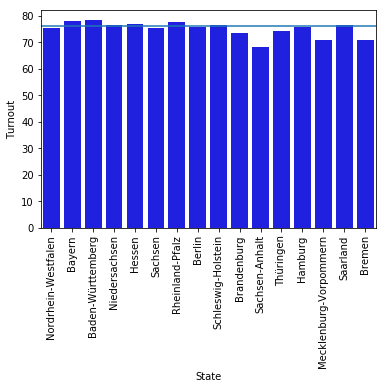

In [24]:
turnouts = []
for state in states:
    turnouts.append(turnout_for_state(state))
    
temp_df = pd.DataFrame({'State' : states, 'Turnout' : turnouts})
sns.barplot(x='State', y='Turnout', data=temp_df, color='blue');
plt.xticks(rotation=90);
plt.axhline(turnout * 100);


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [25]:
df.describe()

,Unnamed: 0,area_id,registered_voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,150.000000,150.000000,206272.672241,157103.006689,1983.816054,1561.678930,155119.190635,155541.327759
std,86.458082,86.458082,23257.553233,20043.563398,675.418515,503.821441,20026.635241,20018.231259
min,1.000000,1.000000,159613.000000,103815.000000,899.000000,670.000000,100434.000000,101888.000000
25%,75.500000,75.500000,188709.000000,142348.500000,1555.500000,1184.500000,140308.000000,140757.000000
50%,150.000000,150.000000,206077.000000,156087.000000,1901.000000,1464.000000,153894.000000,154371.000000
75%,224.500000,224.500000,223054.500000,172094.000000,2322.500000,1936.000000,169779.500000,170149.500000
max,299.000000,299.000000,254300.000000,202546.000000,7562.000000,3311.000000,200324.000000,200879.000000


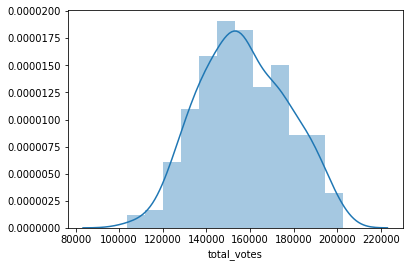

In [26]:
sns.distplot(df['total_votes'], label='Total Votes')

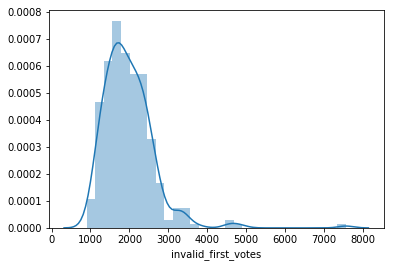

In [27]:
sns.distplot(df['invalid_first_votes'])

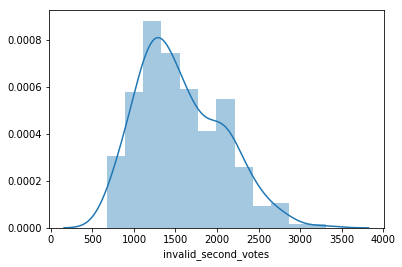

In [28]:
sns.distplot(df['invalid_second_votes'])

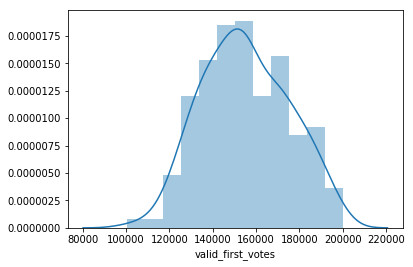

In [29]:
sns.distplot(df['valid_first_votes'])

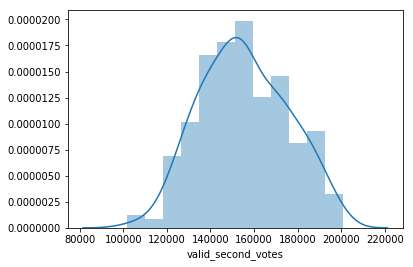

In [30]:
sns.distplot(df['valid_second_votes'])

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables of interest follow a normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no need to tidy or change the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [31]:
df.corr()

,Unnamed: 0,area_id,registered_voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
Unnamed: 0,1.000000,1.000000,-0.060656,0.075622,0.024527,0.063211,0.074859,0.074127
area_id,1.000000,1.000000,-0.060656,0.075622,0.024527,0.063211,0.074859,0.074127
registered_voters,-0.060656,-0.060656,1.000000,0.938972,0.146731,0.189686,0.934817,0.935386
total_votes,0.075622,0.075622,0.938972,1.000000,0.041901,0.062816,0.999432,0.999684
invalid_first_votes,0.024527,0.024527,0.146731,0.041901,1.000000,0.656474,0.008211,0.025432
invalid_second_votes,0.063211,0.063211,0.189686,0.062816,0.656474,1.000000,0.040729,0.037728
valid_first_votes,0.074859,0.074859,0.934817,0.999432,0.008211,0.040729,1.000000,0.999672
valid_second_votes,0.074127,0.074127,0.935386,0.999684,0.025432,0.037728,0.999672,1.000000


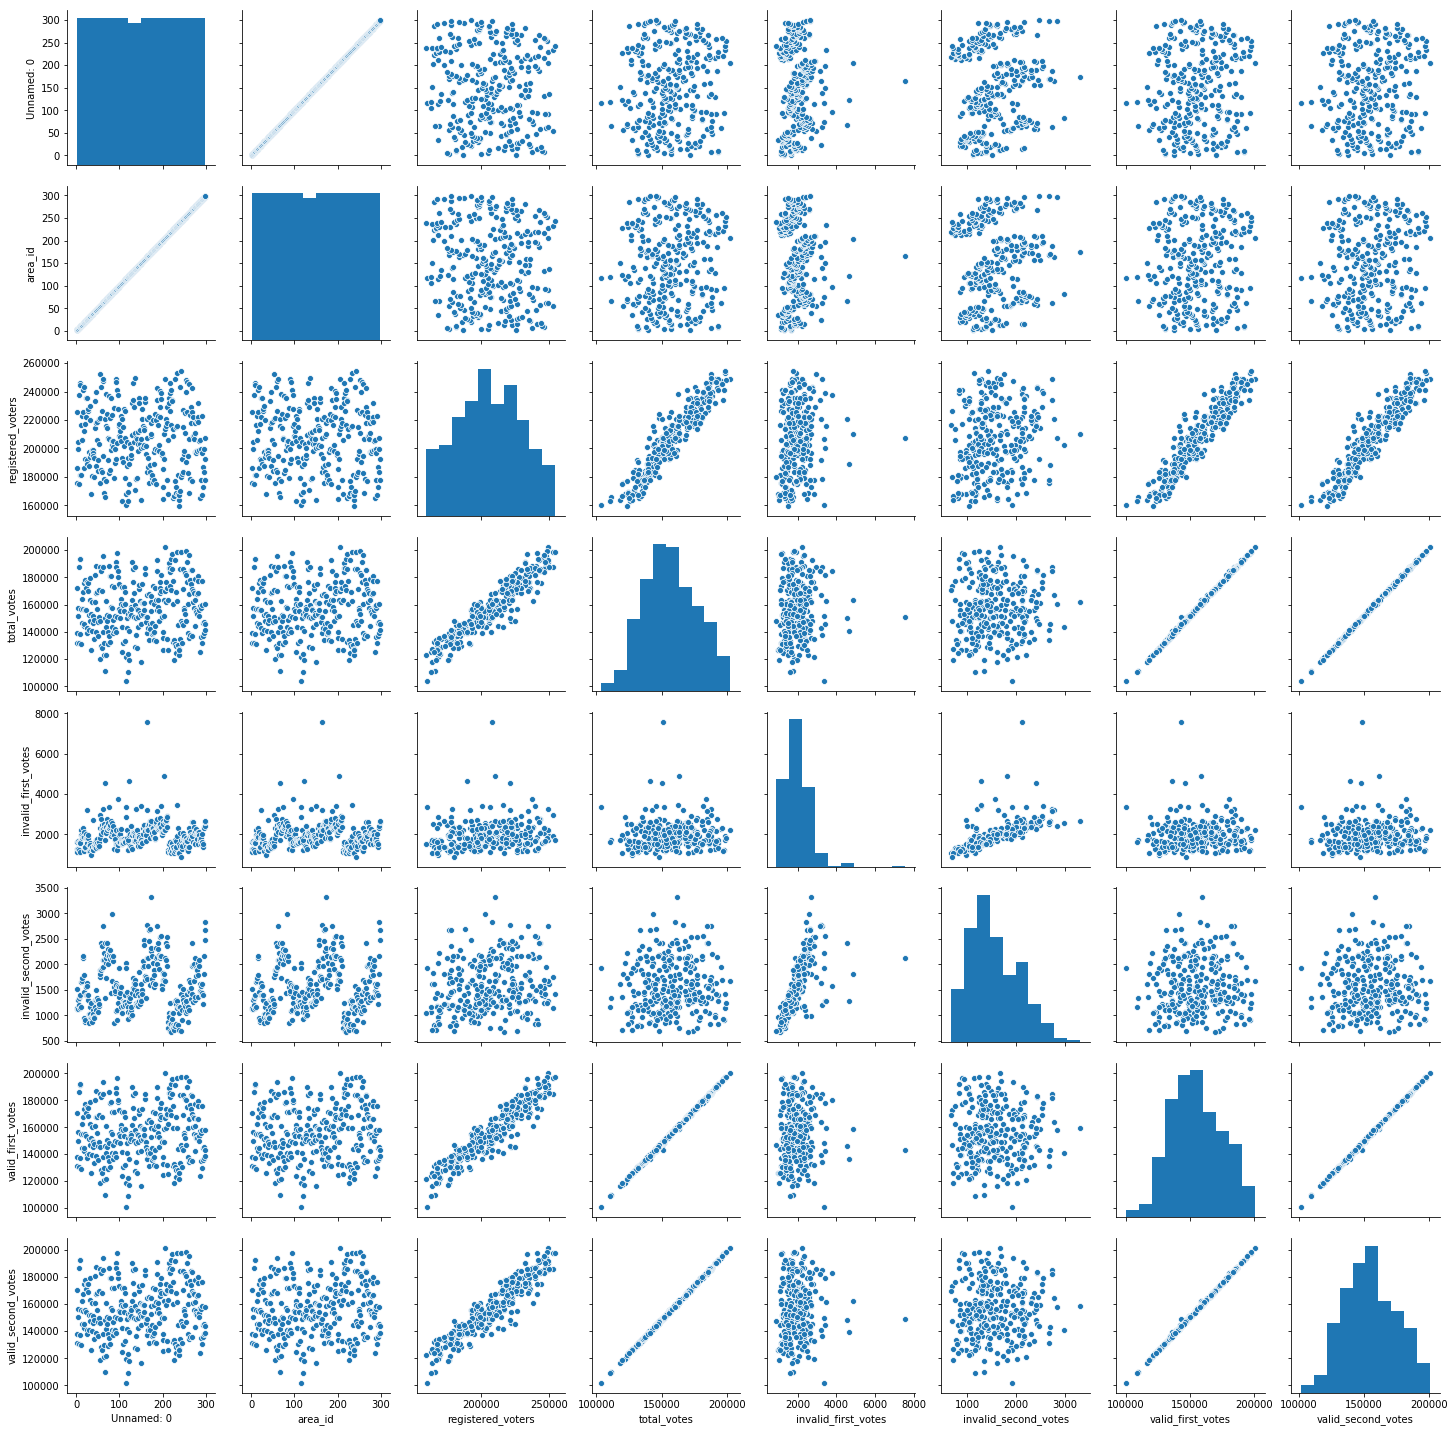

In [32]:
sns.pairplot(df)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong positive correlation between valid first and second votes. And also a less stronger between invalid first and second votes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [33]:
df2.query('area_id == 1')['votes_first_vote'].sum() + df2.query('area_id == 1')['votes_second_vote'].sum()

340654

In [34]:
df2.shape

(12857, 7)

In [35]:
df.shape

(299, 10)

In [36]:
df2.party.unique()

array(['UNION', 'Sozialdemokratische.Partei.Deutschlands', 'DIE.LINKE',
       'BÜNDNIS.90.DIE.GRÜNEN', 'Freie.Demokratische.Partei',
       'Alternative.für.Deutschland', 'Piratenpartei.Deutschland',
       'Nationaldemokratische.Partei.Deutschlands', 'FREIE.WÄHLER',
       'PARTEI.MENSCH.UMWELT.TIERSCHUTZ',
       'Ökologisch.Demokratische.Partei',
       'Partei.für.Arbeit..Rechtsstaat..Tierschutz..Elitenförderung.und.basisdemokratische.Initiative',
       'Bayernpartei', 'Ab.jetzt...Demokratie.durch.Volksabstimmung',
       'Partei.der.Vernunft',
       'Marxistisch.Leninistische.Partei.Deutschlands',
       'Bürgerrechtsbewegung.Solidarität',
       'Sozialistische.Gleichheitspartei..Vierte.Internationale',
       'DIE.RECHTE', 'Allianz.Deutscher.Demokraten',
       'Allianz.für.Menschenrechte.Tier..und.Naturschutz',
       'bergpartei..die.überpartei', 'Bündnis.Grundeinkommen',
       'DEMOKRATIE.IN.BEWEGUNG', 'Deutsche.Kommunistische.Partei',
       'Deutsche.Mitte', 'Die.Grauen

In [37]:
df.query('state == "Hessen"')

,Unnamed: 0,area_id,area_names,state,registered_voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
166,167,167,Waldeck,Hessen,186825,142857,2219,2127,140638,140730
167,168,168,Kassel,Hessen,222451,167847,2579,2452,165268,165395
168,169,169,Werra-Meißner – Hersfeld-Rotenburg,Hessen,175992,133740,2513,2677,131227,131063
169,170,170,Schwalm-Eder,Hessen,188074,145743,2655,2689,143088,143054
170,171,171,Marburg,Hessen,183296,142371,1804,1587,140567,140784
171,172,172,Lahn-Dill,Hessen,208740,155058,2515,2263,152543,152795
172,173,173,Gießen,Hessen,217806,166633,2479,2322,164154,164311
173,174,174,Fulda,Hessen,209966,161937,2684,3311,159253,158626
174,175,175,Main-Kinzig – Wetterau II – Schotten,Hessen,179307,138191,2329,2169,135862,136022
175,176,176,Hochtaunus,Hessen,181516,146314,2055,1705,144259,144609


In [38]:
areas = geometries.records()
next(areas)


<Record: <shapely.geometry.polygon.Polygon object at 0x1a1cbe16a0>, {'WKR_NR': 1, 'WKR_NAME': 'Flensburg \x96 Schleswig', 'LAND_NR': '01', 'LAND_NAME': 'Schleswig-Holstein'}, <fields>>

In [39]:
def random_color():
    return list(np.random.choice(range(256), size=3))
                    

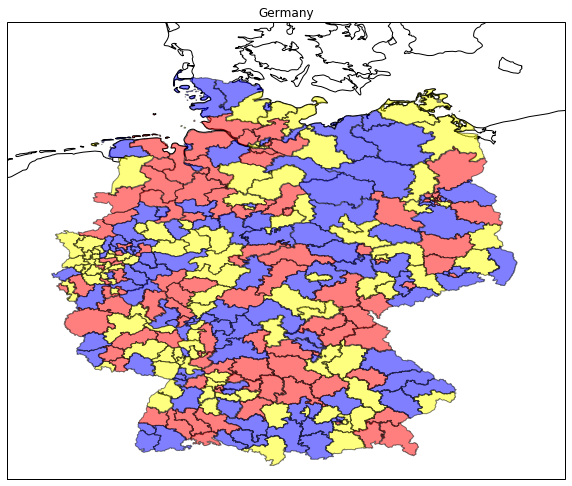

In [40]:
fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.title('Germany')
ax.coastlines(resolution='10m')
colors = ['blue', 'yellow', 'red']

for shape in shapes:
    
    ax.add_geometries([shape], ccrs.PlateCarree(), edgecolor='black', facecolor=np.random.choice(colors), alpha=0.5)
                      
ax.set_extent([5,16,47,56], ccrs.PlateCarree())

plt.show();